In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
diversity_df = pd.read_csv('data/diversityindex.csv')
unemployment_df = pd.read_csv('data/GeoFRED_Unemployment_Rate_by_County_Percent.csv')
election_df = pd.read_csv('data/president_county_candidate.csv.zip')
vax_df = pd.read_csv('data/us_state_vaccinations.csv')
states_df = pd.read_csv('data/state_abbrev.csv')

In [3]:
election_df.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [4]:
diversity_df.head()

,Location,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013"
0,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2
1,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7
2,"Maui County, HI",0.740757,0.8,0.6,28.8,10.6,23.3,10.7,31.5
3,"Alameda County, CA",0.740399,12.4,1.2,28.2,1.0,5.2,22.7,33.2
4,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9


In [5]:
unemployment_df.head()

,Series ID,Region Name,Region Code,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,SCABBE1URN,"Abbeville County, SC",45001,3.8,6.6,7.7,9.1,8.2,7.7,8.8,...,14.2,13.6,12.5,10.6,9.5,7.7,6.9,5.5,4.6,4.2
1,LAACAD0URN,"Acadia Parish, LA",22001,5.8,6.0,6.3,6.8,5.8,6.1,3.6,...,6.5,7.3,6.7,6.0,6.0,5.8,6.9,7.4,5.9,5.4
2,VAACCO1URN,"Accomack County, VA",51001,3.0,3.4,4.2,4.4,4.7,4.7,4.3,...,6.5,7.9,8.4,7.9,7.2,6.7,5.5,5.0,4.9,4.1
3,IDADAC1URN,"Ada County, ID",16001,3.4,3.9,4.7,4.9,4.1,3.3,2.7,...,8.9,8.3,7.3,6.2,5.2,4.2,3.7,3.3,2.8,2.4
4,OKADAI1URN,"Adair County, OK",40001,3.5,4.1,4.8,7.8,6.2,4.8,4.4,...,8.0,10.5,9.2,9.1,9.8,8.0,6.1,5.9,5.0,4.4


In [6]:
vax_df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [7]:
states_df.head()

,State,Abbreviation,Unnamed: 2
0,Alabama,AL,NaN
1,Alaska,AK,NaN
2,Arizona,AZ,NaN
3,Arkansas,AR,NaN
4,California,CA,NaN


# Data Cleaning

Change formatting of county names to match election dataset to diversity & unemployment datasets.

In [8]:
states_dict = dict(zip(states_df['State'], states_df['Abbreviation']))

In [9]:
election_df['state_abbr'] = election_df['state'].map(states_dict)
election_df.head()

,state,county,candidate,party,total_votes,won,state_abbr
0,Delaware,Kent County,Joe Biden,DEM,44552,True,DE
1,Delaware,Kent County,Donald Trump,REP,41009,False,DE
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False,DE
3,Delaware,Kent County,Howie Hawkins,GRN,420,False,DE
4,Delaware,New Castle County,Joe Biden,DEM,195034,True,DE


Create list of county names combined with their state's abbreviation.

In [10]:
def get_county_abbr(list_county, list_abbr):
    list_county_abbr = []
    for i in range(len(list_county)):
        list_county_abbr.append(list_county[i] + ', ' + list_abbr[i])
    return list_county_abbr    

In [11]:
election_df['county_abbr'] = get_county_abbr(election_df['county'], election_df['state_abbr'])
len(election_df['county_abbr'].unique())

4633

In [12]:
len(election_df)

32177

Subset election dataset to only include the tally for the winning candidate in each county.

In [13]:
won_elect_df = election_df[election_df['won']==True]
won_elect_df

,state,county,candidate,party,total_votes,won,state_abbr,county_abbr
0,Delaware,Kent County,Joe Biden,DEM,44552,True,DE,"Kent County, DE"
4,Delaware,New Castle County,Joe Biden,DEM,195034,True,DE,"New Castle County, DE"
8,Delaware,Sussex County,Donald Trump,REP,71230,True,DE,"Sussex County, DE"
12,District of Columbia,District of Columbia,Joe Biden,DEM,39041,True,DC,"District of Columbia, DC"
19,District of Columbia,Ward 2,Joe Biden,DEM,29078,True,DC,"Ward 2, DC"
...,...,...,...,...,...,...,...,...
32157,Arizona,Graham County,Donald Trump,REP,10749,True,AZ,"Graham County, AZ"
32161,Arizona,Greenlee County,Donald Trump,REP,2433,True,AZ,"Greenlee County, AZ"
32165,Arizona,La Paz County,Donald Trump,REP,5129,True,AZ,"La Paz County, AZ"
32169,Arizona,Maricopa County,Joe Biden,DEM,1040774,True,AZ,"Maricopa County, AZ"


In [14]:
len(unemployment_df['Region Name'].values)

3136

In [15]:
len(diversity_df['Location'].unique())

3195

Merge the won_elect dataset with the diversity dataset.

In [16]:
df = diversity_df.merge(won_elect_df, how = 'outer', left_on = 'Location', right_on = 'county_abbr')

In [17]:
df.shape

(4786, 17)

In [18]:
df.isnull().sum()

Location                                                      1591
Diversity-Index                                               1591
Black or African American alone, percent, 2013                1591
American Indian and Alaska Native alone, percent, 2013        1591
Asian alone, percent, 2013                                    1591
Native Hawaiian and Other Pacific Islander alone, percent,    1591
Two or More Races, percent, 2013                              1591
Hispanic or Latino, percent, 2013                             1591
White alone, not Hispanic or Latino, percent, 2013            1591
state                                                          153
county                                                         153
candidate                                                      153
party                                                          153
total_votes                                                    153
won                                                           

In [19]:
df[df['state'].isnull()]

,Location,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",state,county,candidate,party,total_votes,won,state_abbr,county_abbr
0,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,HAWAII,0.731461,2.3,0.4,37.7,10.0,23.1,9.8,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,"Yakutat City and Borough, AK",0.698748,0.9,36.6,5.6,1.4,15.9,3.1,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,CALIFORNIA,0.674524,6.6,1.7,14.1,0.5,3.7,38.4,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,"Essex County, VT",0.077938,0.4,0.6,0.4,0.0,1.5,1.3,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2919,"Franklin County, ME",0.076098,0.4,0.4,0.6,0.0,1.3,1.2,96.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2940,"Somerset County, ME",0.074174,0.5,0.5,0.6,0.0,1.4,1.0,96.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2944,"Waldo County, ME",0.074163,0.5,0.5,0.5,0.1,1.4,1.1,96.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill missing values for states' abbreviations in order to figure out which states are missing data.

In [20]:
df['state_abbr'] = df.apply(lambda x: x['Location'][-2:] if pd.isnull(x['state_abbr']) else x['state_abbr'], axis=1)

In [21]:
df[df['state'].isnull()]['state_abbr'].value_counts()

AK    29
ME    16
MA    16
VT    14
NH    10
CT     8
RI     6
NA     6
IA     6
AS     3
TA     3
RE     2
ND     2
KA     2
ON     2
DA     2
WA     1
LA     1
NT     1
HI     1
SD     1
HO     1
CO     1
PI     1
NM     1
TS     1
IN     1
EE     1
VA     1
AH     1
II     1
EY     1
AN     1
IO     1
KY     1
UT     1
NG     1
IS     1
DO     1
NE     1
ES     1
RK     1
Name: state_abbr, dtype: int64

Fill missing county/town diversity values with state's overall diversity. 

In [22]:
index_AK = df[df['Location']=='ALASKA'].index[0]
AK_diversity = df.iloc[index_AK, 1:9].to_dict()
AK_diversity

{'Diversity-Index': 0.57334,
 'Black or African American alone, percent, 2013': 3.9,
 'American Indian and Alaska Native alone, percent, 2013': 14.7,
 'Asian alone, percent, 2013': 5.8,
 'Native Hawaiian and Other Pacific Islander alone, percent,': 1.2,
 'Two or More Races, percent, 2013': 7.1,
 'Hispanic or Latino, percent, 2013': 6.6,
 'White alone, not Hispanic or Latino, percent, 2013': 62.5}

In [23]:
df.loc[df['state']=='Alaska'] = df.loc[df['state']=='Alaska'].fillna(value=AK_diversity)

In [24]:
len(won_elect_df[won_elect_df['state']=='Maine']['county'].unique())

498

In [25]:
index_ME = df[df['Location']=='MAINE'].index[0]
ME_diversity = df.iloc[index_ME, 1:9].to_dict()
df.loc[df['state']=='Maine'] = df.loc[df['state']=='Maine'].fillna(value=ME_diversity)

In [26]:
index_MA = df[df['Location']=='MASSACHUSETTS'].index[0]
MA_diversity = df.iloc[index_MA, 1:9].to_dict()
df.loc[df['state']=='Massachusetts'] = df.loc[df['state']=='Massachusetts'].fillna(value=MA_diversity)

In [27]:
index_VT = df[df['Location']=='VERMONT'].index[0]
VT_diversity = df.iloc[index_VT, 1:9].to_dict()
df.loc[df['state']=='Vermont'] = df.loc[df['state']=='Vermont'].fillna(value=VT_diversity)

In [28]:
index_NH = df[df['Location']=='NEW HAMPSHIRE'].index[0]
NH_diversity = df.iloc[index_NH, 1:9].to_dict()
df.loc[df['state']=='New Hampshire'] = df.loc[df['state']=='New Hampshire'].fillna(value=NH_diversity)

In [29]:
index_CT = df[df['Location']=='CONNECTICUT'].index[0]
CT_diversity = df.iloc[index_CT, 1:9].to_dict()
df.loc[df['state']=='Connecticut'] = df.loc[df['state']=='Connecticut'].fillna(value=CT_diversity)

In [30]:
index_RI = df[df['Location']=='RHODE ISLAND'].index[0]
RI_diversity = df.iloc[index_RI, 1:9].to_dict()
df.loc[df['state']=='Rhode Island'] = df.loc[df['state']=='Rhode Island'].fillna(value=RI_diversity)

In [31]:
df[df['state'].isnull()]

,Location,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",state,county,candidate,party,total_votes,won,state_abbr,county_abbr
0,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2,NaN,NaN,NaN,NaN,NaN,NaN,AK,NaN
4,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9,NaN,NaN,NaN,NaN,NaN,NaN,AK,NaN
7,HAWAII,0.731461,2.3,0.4,37.7,10.0,23.1,9.8,23.0,NaN,NaN,NaN,NaN,NaN,NaN,II,NaN
13,"Yakutat City and Borough, AK",0.698748,0.9,36.6,5.6,1.4,15.9,3.1,37.1,NaN,NaN,NaN,NaN,NaN,NaN,AK,NaN
32,CALIFORNIA,0.674524,6.6,1.7,14.1,0.5,3.7,38.4,39.0,NaN,NaN,NaN,NaN,NaN,NaN,IA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,"Essex County, VT",0.077938,0.4,0.6,0.4,0.0,1.5,1.3,96.0,NaN,NaN,NaN,NaN,NaN,NaN,VT,NaN
2919,"Franklin County, ME",0.076098,0.4,0.4,0.6,0.0,1.3,1.2,96.1,NaN,NaN,NaN,NaN,NaN,NaN,ME,NaN
2940,"Somerset County, ME",0.074174,0.5,0.5,0.6,0.0,1.4,1.0,96.2,NaN,NaN,NaN,NaN,NaN,NaN,ME,NaN
2944,"Waldo County, ME",0.074163,0.5,0.5,0.5,0.1,1.4,1.1,96.2,NaN,NaN,NaN,NaN,NaN,NaN,ME,NaN


Identify which rows are state aggregates vs. individual counties.

In [32]:
def get_overall_status(list_location):
    list_status = []
    for location in list_location:
        if type(location)!=str:
            list_status.append(False)
        elif "," in location:
            list_status.append(False)
        else:
            list_status.append(True)
    return list_status

In [33]:
df['state_sum'] = get_overall_status(df['Location'])

In [34]:
df_state_sum = df.loc[df['state_sum']==True]
df_state_sum['Location'] = df_state_sum['Location'].str.title()


In [35]:
states_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [36]:
df_state_sum['state_abbr'] = df_state_sum['Location'].map(states_dict)

In [37]:
DC_index = df_state_sum.loc[df_state_sum['Location']=='District Of Columbia'].index[0]

In [38]:
df_state_sum.loc[DC_index, 'state_abbr'] = 'DC'

In [39]:
US_index = df_state_sum.loc[df_state_sum['Location']=='United States'].index[0]
df_state_sum.loc[US_index, 'state_abbr'] = 'US'

In [40]:
df_state_sum.drop(columns = ['state','county','won','county_abbr','state_sum'], inplace=True)

In [41]:
states_elect = pd.read_csv('data/1976-2020-president.csv')
states_elect.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [42]:
states_elect = states_elect.loc[states_elect['year']==2020]

In [43]:
states_elect.drop(columns=['year', 'state_fips', 'state_cen', 'state_ic', 'office', 'party_detailed', 'writein', 'version', 'notes'], inplace=True)

In [44]:
states_elect['party_simplified'].unique()

array(['DEMOCRAT', 'REPUBLICAN', 'LIBERTARIAN', 'OTHER'], dtype=object)

In [45]:
states_elect.loc[(states_elect['party_simplified'] == 'OTHER'),'candidate']='OTHER'

In [46]:
states_2 = states_elect.groupby(['state', 'candidate']).sum()

In [47]:
states_2 = states_elect[states_elect['candidate']=='OTHER'].groupby(['state']).sum()
states_2

,candidatevotes,totalvotes
state,,
ALABAMA,7312,2323282
ALASKA,6904,1797650
ARIZONA,2032,16936630
ARKANSAS,21357,12190690
CALIFORNIA,196307,140007048
COLORADO,58561,65599600
CONNECTICUT,8079,20062427
DELAWARE,2475,9078228
DISTRICT OF COLUMBIA,6411,1377424


In [48]:
other_dict = dict(zip(list(states_2.index), states_2['candidatevotes']))

In [49]:
other_dict

{'ALABAMA': 7312,
 'ALASKA': 6904,
 'ARIZONA': 2032,
 'ARKANSAS': 21357,
 'CALIFORNIA': 196307,
 'COLORADO': 58561,
 'CONNECTICUT': 8079,
 'DELAWARE': 2475,
 'DISTRICT OF COLUMBIA': 6411,
 'FLORIDA': 31356,
 'GEORGIA': 2244,
 'HAWAII': 11251,
 'IDAHO': 10470,
 'ILLINOIS': 48393,
 'INDIANA': 1951,
 'IOWA': 23760,
 'KENTUCKY': 11414,
 'LOUISIANA': 14607,
 'MAINE': 18344,
 'MARYLAND': 42105,
 'MASSACHUSETTS': 61588,
 'MICHIGAN': 25029,
 'MINNESOTA': 41053,
 'MISSISSIPPI': 9571,
 'MISSOURI': 13007,
 'MONTANA': 34,
 'NEBRASKA': 4671,
 'NEVADA': 17217,
 'NEW HAMPSHIRE': 2372,
 'NEW JERSEY': 26067,
 'NEW MEXICO': 7872,
 'NEW YORK': 125718,
 'NORTH CAROLINA': 33059,
 'NORTH DAKOTA': 1929,
 'OHIO': 20634,
 'OKLAHOMA': 11798,
 'OREGON': 33908,
 'RHODE ISLAND': 4529,
 'SOUTH CAROLINA': 9536,
 'TENNESSEE': 57665,
 'TEXAS': 39340,
 'UTAH': 24420,
 'VERMONT': 11836,
 'VIRGINIA': 19765,
 'WASHINGTON': 52868,
 'WEST VIRGINIA': 2599,
 'WISCONSIN': 56991,
 'WYOMING': 5685}

In [50]:
def get_others(dict_, list_states, list_candidates, list_votes):
    votes = []
    for i in range(len(list_states)):
        if list_candidates[i]=='OTHER':
            votes.append(dict_[list_states[i]])
        else:
            votes.append(list_votes[i])
    return votes

In [51]:
states_elect['candidatevotes'] = get_others(other_dict, list(states_elect['state']), list(states_elect['candidate']), list(states_elect['candidatevotes']))

In [52]:
states_elect.drop_duplicates(inplace = True)

In [53]:
win_tallies = list(states_elect.groupby('state')['candidatevotes'].max())
states = list(states_elect['state'].unique())
win_dict = dict(zip(states, win_tallies))
win_dict

{'ALABAMA': 1441170,
 'ALASKA': 189951,
 'ARIZONA': 1672143,
 'ARKANSAS': 760647,
 'CALIFORNIA': 11110250,
 'COLORADO': 1804352,
 'CONNECTICUT': 1080831,
 'DELAWARE': 296268,
 'DISTRICT OF COLUMBIA': 317323,
 'FLORIDA': 5668731,
 'GEORGIA': 2473633,
 'HAWAII': 366130,
 'IDAHO': 554119,
 'ILLINOIS': 3471915,
 'INDIANA': 1729519,
 'IOWA': 897672,
 'KANSAS': 771406,
 'KENTUCKY': 1326646,
 'LOUISIANA': 1255776,
 'MAINE': 435072,
 'MARYLAND': 1985023,
 'MASSACHUSETTS': 2382202,
 'MICHIGAN': 2804040,
 'MINNESOTA': 1717077,
 'MISSISSIPPI': 756764,
 'MISSOURI': 1718736,
 'MONTANA': 343602,
 'NEBRASKA': 556846,
 'NEVADA': 703486,
 'NEW HAMPSHIRE': 424921,
 'NEW JERSEY': 2608335,
 'NEW MEXICO': 501614,
 'NEW YORK': 5230985,
 'NORTH CAROLINA': 2758773,
 'NORTH DAKOTA': 235595,
 'OHIO': 3154834,
 'OKLAHOMA': 1020280,
 'OREGON': 1340383,
 'PENNSYLVANIA': 3458229,
 'RHODE ISLAND': 307486,
 'SOUTH CAROLINA': 1385103,
 'SOUTH DAKOTA': 261043,
 'TENNESSEE': 1852475,
 'TEXAS': 5890347,
 'UTAH': 865140,


In [54]:
states_elect['winner_tally'] = states_elect['state']
states_elect

,state,state_po,candidate,candidatevotes,totalvotes,party_simplified,winner_tally
3740,ALABAMA,AL,"BIDEN, JOSEPH R. JR",849624,2323282,DEMOCRAT,ALABAMA
3741,ALABAMA,AL,"TRUMP, DONALD J.",1441170,2323282,REPUBLICAN,ALABAMA
3742,ALABAMA,AL,"JORGENSEN, JO",25176,2323282,LIBERTARIAN,ALABAMA
3743,ALABAMA,AL,OTHER,7312,2323282,OTHER,ALABAMA
3744,ALASKA,AK,"BIDEN, JOSEPH R. JR",153778,359530,DEMOCRAT,ALASKA
...,...,...,...,...,...,...,...
4269,WISCONSIN,WI,OTHER,56991,3298041,OTHER,WISCONSIN
4280,WYOMING,WY,"BIDEN, JOSEPH R. JR",73491,278503,DEMOCRAT,WYOMING
4281,WYOMING,WY,"TRUMP, DONALD J.",193559,278503,REPUBLICAN,WYOMING
4282,WYOMING,WY,"JORGENSEN, JO",5768,278503,LIBERTARIAN,WYOMING


In [55]:
states_elect['winner_tally'] = states_elect['winner_tally'].map(win_dict)

In [56]:
states_elect['winner'] = states_elect['winner_tally']

In [57]:
states_elect['winner'] = np.where(states_elect['candidatevotes']==states_elect['winner_tally'], True, False)
states_elect.drop('winner_tally', axis=1, inplace=True)
states_elect

,state,state_po,candidate,candidatevotes,totalvotes,party_simplified,winner
3740,ALABAMA,AL,"BIDEN, JOSEPH R. JR",849624,2323282,DEMOCRAT,False
3741,ALABAMA,AL,"TRUMP, DONALD J.",1441170,2323282,REPUBLICAN,True
3742,ALABAMA,AL,"JORGENSEN, JO",25176,2323282,LIBERTARIAN,False
3743,ALABAMA,AL,OTHER,7312,2323282,OTHER,False
3744,ALASKA,AK,"BIDEN, JOSEPH R. JR",153778,359530,DEMOCRAT,False
...,...,...,...,...,...,...,...
4269,WISCONSIN,WI,OTHER,56991,3298041,OTHER,False
4280,WYOMING,WY,"BIDEN, JOSEPH R. JR",73491,278503,DEMOCRAT,False
4281,WYOMING,WY,"TRUMP, DONALD J.",193559,278503,REPUBLICAN,True
4282,WYOMING,WY,"JORGENSEN, JO",5768,278503,LIBERTARIAN,False


In [58]:
states_elect['vote_ratio'] = states_elect['candidatevotes']/states_elect['totalvotes']
states_elect

,state,state_po,candidate,candidatevotes,totalvotes,party_simplified,winner,vote_ratio
3740,ALABAMA,AL,"BIDEN, JOSEPH R. JR",849624,2323282,DEMOCRAT,False,0.365700
3741,ALABAMA,AL,"TRUMP, DONALD J.",1441170,2323282,REPUBLICAN,True,0.620316
3742,ALABAMA,AL,"JORGENSEN, JO",25176,2323282,LIBERTARIAN,False,0.010836
3743,ALABAMA,AL,OTHER,7312,2323282,OTHER,False,0.003147
3744,ALASKA,AK,"BIDEN, JOSEPH R. JR",153778,359530,DEMOCRAT,False,0.427720
...,...,...,...,...,...,...,...,...
4269,WISCONSIN,WI,OTHER,56991,3298041,OTHER,False,0.017280
4280,WYOMING,WY,"BIDEN, JOSEPH R. JR",73491,278503,DEMOCRAT,False,0.263879
4281,WYOMING,WY,"TRUMP, DONALD J.",193559,278503,REPUBLICAN,True,0.694998
4282,WYOMING,WY,"JORGENSEN, JO",5768,278503,LIBERTARIAN,False,0.020711


In [59]:
states_winners = states_elect[states_elect['winner']==True]

In [60]:
states_winners['state'] = states_winners['state'].str.title()

In [61]:
states_winners.head()

,state,state_po,candidate,candidatevotes,totalvotes,party_simplified,winner,vote_ratio
3741,Alabama,AL,"TRUMP, DONALD J.",1441170,2323282,REPUBLICAN,True,0.620316
3745,Alaska,AK,"TRUMP, DONALD J.",189951,359530,REPUBLICAN,True,0.528331
3752,Arizona,AZ,"BIDEN, JOSEPH R. JR",1672143,3387326,DEMOCRAT,True,0.493647
3771,Arkansas,AR,"TRUMP, DONALD J.",760647,1219069,REPUBLICAN,True,0.623957
3773,California,CA,"BIDEN, JOSEPH R. JR",11110250,17500881,DEMOCRAT,True,0.634839


In [62]:
states_merged = states_elect.merge(df_state_sum, how='outer', right_on='state_abbr', left_on='state_po')

In [63]:
states_merged.drop(['Location', 'candidate_y', 'party', 'total_votes', 'state_abbr'], axis=1, inplace=True)

In [64]:
merged_counties = df.merge(states_merged, how='outer', left_on='state_abbr', right_on='state_po')
merged_counties = merged_counties[merged_counties['winner']==True]

In [65]:
merged_counties

,Location,Diversity-Index_x,"Black or African American alone, percent, 2013_x","American Indian and Alaska Native alone, percent, 2013_x","Asian alone, percent, 2013_x","Native Hawaiian and Other Pacific Islander alone, percent,_x","Two or More Races, percent, 2013_x","Hispanic or Latino, percent, 2013_x","White alone, not Hispanic or Latino, percent, 2013_x",state_x,...,winner,vote_ratio,Diversity-Index_y,"Black or African American alone, percent, 2013_y","American Indian and Alaska Native alone, percent, 2013_y","Asian alone, percent, 2013_y","Native Hawaiian and Other Pacific Islander alone, percent,_y","Two or More Races, percent, 2013_y","Hispanic or Latino, percent, 2013_y","White alone, not Hispanic or Latino, percent, 2013_y"
1,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2,NaN,...,True,0.528331,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5
5,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9,NaN,...,True,0.528331,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5
9,"Yakutat City and Borough, AK",0.698748,0.9,36.6,5.6,1.4,15.9,3.1,37.1,NaN,...,True,0.528331,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5
13,"Kodiak Island Borough, AK",0.665746,1.3,13.0,20.3,1.0,6.8,8.4,51.4,NaN,...,True,0.528331,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5
17,"Bristol Bay Borough, AK",0.648271,0.0,33.8,1.1,0.3,17.5,3.9,45.3,NaN,...,True,0.528331,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18612,NaN,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0,Maine,...,True,0.525256,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0
18616,NaN,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0,Maine,...,True,0.525256,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0
18620,NaN,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0,Maine,...,True,0.525256,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0
18624,NaN,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0,Maine,...,True,0.525256,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0


In [66]:
merged_counties.dropna(subset=['Diversity-Index_x'], inplace=True)
merged_counties.isnull().sum()

Location                                                        1580
Diversity-Index_x                                                  0
Black or African American alone, percent, 2013_x                   0
American Indian and Alaska Native alone, percent, 2013_x           0
Asian alone, percent, 2013_x                                       0
Native Hawaiian and Other Pacific Islander alone, percent,_x       0
Two or More Races, percent, 2013_x                                 0
Hispanic or Latino, percent, 2013_x                                0
White alone, not Hispanic or Latino, percent, 2013_x               0
state_x                                                          118
county                                                           118
candidate                                                        118
party                                                            118
total_votes                                                      118
won                               

In [67]:
merged_counties.drop_duplicates(subset=['Diversity-Index_x', 'Diversity-Index_y'], inplace=True)

In [68]:
merged_counties[merged_counties['Location'].isnull()]

,Location,Diversity-Index_x,"Black or African American alone, percent, 2013_x","American Indian and Alaska Native alone, percent, 2013_x","Asian alone, percent, 2013_x","Native Hawaiian and Other Pacific Islander alone, percent,_x","Two or More Races, percent, 2013_x","Hispanic or Latino, percent, 2013_x","White alone, not Hispanic or Latino, percent, 2013_x",state_x,...,winner,vote_ratio,Diversity-Index_y,"Black or African American alone, percent, 2013_y","American Indian and Alaska Native alone, percent, 2013_y","Asian alone, percent, 2013_y","Native Hawaiian and Other Pacific Islander alone, percent,_y","Two or More Races, percent, 2013_y","Hispanic or Latino, percent, 2013_y","White alone, not Hispanic or Latino, percent, 2013_y"
117,NaN,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5,Alaska,...,True,0.528331,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5
5092,NaN,0.414346,8.1,0.5,6.0,0.1,2.1,10.5,75.1,Massachusetts,...,True,0.651230,0.414346,8.1,0.5,6.0,0.1,2.1,10.5,75.1
12480,NaN,0.478890,11.3,0.5,4.3,0.1,2.1,14.7,69.6,Connecticut,...,True,0.592607,0.478890,11.3,0.5,4.3,0.1,2.1,14.7,69.6
13583,NaN,0.407071,7.5,0.9,3.3,0.2,2.5,13.6,75.3,Rhode Island,...,True,0.594762,0.407071,7.5,0.9,3.3,0.2,2.5,13.6,75.3
14590,NaN,0.158854,1.5,0.3,2.4,0.0,1.6,3.2,91.6,New Hampshire,...,True,0.527078,0.158854,1.5,0.3,2.4,0.0,1.6,3.2,91.6
15592,NaN,0.119187,1.2,0.4,1.4,0.0,1.8,1.7,93.8,Vermont,...,True,0.654558,0.119187,1.2,0.4,1.4,0.0,1.8,1.7,93.8
16640,NaN,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0,Maine,...,True,0.525256,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0


In [69]:
merged_counties.loc[(merged_counties['state_x']=='Alaska'), 'Location']='Alaska'
merged_counties.loc[(merged_counties['state_x']=='Massachusetts'), 'Location']='Massachusetts'
merged_counties.loc[(merged_counties['state_x']=='Connecticut'), 'Location']='Connecticut'
merged_counties.loc[(merged_counties['state_x']=='Rhode Island'), 'Location']='Rhode Island'
merged_counties.loc[(merged_counties['state_x']=='New Hampshire'), 'Location']='New Hampshire'
merged_counties.loc[(merged_counties['state_x']=='Vermont'), 'Location']='Vermont'
merged_counties.loc[(merged_counties['state_x']=='Maine'), 'Location']='Maine'

In [70]:
merged_counties.dropna(subset=['state_x'], inplace=True)

In [71]:
merged_counties.columns

Index(['Location', 'Diversity-Index_x',
       'Black or African American alone, percent, 2013_x',
       'American Indian and Alaska Native alone, percent, 2013_x',
       'Asian alone, percent, 2013_x',
       'Native Hawaiian and Other Pacific Islander alone, percent,_x',
       'Two or More Races, percent, 2013_x',
       'Hispanic or Latino, percent, 2013_x',
       'White alone, not Hispanic or Latino, percent, 2013_x', 'state_x',
       'county', 'candidate', 'party', 'total_votes', 'won', 'state_abbr',
       'county_abbr', 'state_sum', 'state_y', 'state_po', 'candidate_x',
       'candidatevotes', 'totalvotes', 'party_simplified', 'winner',
       'vote_ratio', 'Diversity-Index_y',
       'Black or African American alone, percent, 2013_y',
       'American Indian and Alaska Native alone, percent, 2013_y',
       'Asian alone, percent, 2013_y',
       'Native Hawaiian and Other Pacific Islander alone, percent,_y',
       'Two or More Races, percent, 2013_y',
       'Hispanic or

In [72]:
merged_counties.drop(merged_counties.iloc[:, -7:], inplace=True, axis = 1)
merged_counties.drop(columns=['won', 'county', 'state_po', 'winner', 'state_sum', 'county_abbr', 'state_y', 'party', 'party_simplified'], inplace=True)

In [73]:
merged_counties['candidate'].value_counts()

Donald Trump    2561
Joe Biden        486
Name: candidate, dtype: int64

In [74]:
merged_counties['candidate_x'].value_counts()

TRUMP, DONALD J.       1963
BIDEN, JOSEPH R. JR    1084
Name: candidate_x, dtype: int64

Clean column names.

In [75]:
mapper_dict = {'Diversity-Index_x':'Loc_DI',
              'Black or African American alone, percent, 2013_x':'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent, 2013_x':'American Indian and Alaska Native alone, percent',
       'Asian alone, percent, 2013_x':'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent,_x':'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent, 2013_x':'Two or More Races, percent',
       'Hispanic or Latino, percent, 2013_x':'Hispanic or Latino, percent',
       'White alone, not Hispanic or Latino, percent, 2013_x':'White alone, not Hispanic or Latino, percent',
        'state_x':'state',
        'candidate':'loc_winner',
        'candidate_x':'won_loc_and_state',
        'Diversity-Index_y':'state_DI',
        'vote_ratio':'win_ratio'}
merged_counties.rename(mapper=mapper_dict, inplace=True, axis=1)

Reformat candidate names to match all columns and change column 'won_loc_and_state' values to True/False based on if the location candidate matches the state candidate.

In [76]:
candidate_dict = {'TRUMP, DONALD J.':'Donald Trump', 'BIDEN, JOSEPH R. JR':'Joe Biden'}
merged_counties['won_loc_and_state']=merged_counties['won_loc_and_state'].map(candidate_dict)

In [77]:
merged_counties['won_loc_and_state'] = np.where(
    merged_counties['loc_winner']==merged_counties['won_loc_and_state'], 
    True, 
    False)

Make new column 'DI_diff' with the difference between the location's diversity index and its state's diversity index.

In [78]:
merged_counties['DI_diff']=merged_counties['Loc_DI']-merged_counties['state_DI']
merged_counties

,Location,Loc_DI,"Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent","Native Hawaiian and Other Pacific Islander alone, percent","Two or More Races, percent","Hispanic or Latino, percent","White alone, not Hispanic or Latino, percent",state,loc_winner,total_votes,state_abbr,won_loc_and_state,candidatevotes,totalvotes,win_ratio,state_DI,DI_diff
117,Alaska,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5,Alaska,Donald Trump,8081.0,AK,True,189951.0,359530.0,0.528331,0.573340,0.000000
276,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7,New York,Joe Biden,569038.0,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.141243
280,"Kings County, NY",0.692349,35.4,1.0,11.7,0.1,2.3,19.6,36.0,New York,Joe Biden,703310.0,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.091368
284,"New York County, NY",0.658205,18.4,1.2,12.1,0.2,3.1,25.8,47.5,New York,Joe Biden,603040.0,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.057224
288,"Westchester County, NY",0.605911,15.9,0.8,6.1,0.1,2.2,23.3,55.7,New York,Joe Biden,312371.0,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.004930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14534,"Tyler County, WV",0.039485,0.3,0.2,0.2,0.0,0.7,0.7,98.0,West Virginia,Donald Trump,3226.0,WV,True,545382.0,794652.0,0.686316,0.138886,-0.099401
14538,"Lincoln County, WV",0.035585,0.2,0.1,0.1,0.0,0.7,0.6,98.2,West Virginia,Donald Trump,6012.0,WV,True,545382.0,794652.0,0.686316,0.138886,-0.103301
14590,New Hampshire,0.158854,1.5,0.3,2.4,0.0,1.6,3.2,91.6,New Hampshire,Donald Trump,2420.0,NH,False,424921.0,806182.0,0.527078,0.158854,0.000000
15592,Vermont,0.119187,1.2,0.4,1.4,0.0,1.8,1.7,93.8,Vermont,Joe Biden,406.0,VT,True,242820.0,370968.0,0.654558,0.119187,0.000000


In [79]:
unemployment_df.drop(columns = ['Series ID', 'Region Code', '2017'], inplace=True)
unemployment_df.drop(unemployment_df.iloc[:, 1:-2], inplace=True, axis = 1)
unemployment_df.rename({'Region Name':'Location', '2016':'2016_unemployment', '2018':'2018_unemployment'}, inplace=True, axis=1)

In [80]:
merged_counties = merged_counties.merge(unemployment_df, how='outer', on='Location')
merged_counties

,Location,Loc_DI,"Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent","Native Hawaiian and Other Pacific Islander alone, percent","Two or More Races, percent","Hispanic or Latino, percent","White alone, not Hispanic or Latino, percent",state,...,total_votes,state_abbr,won_loc_and_state,candidatevotes,totalvotes,win_ratio,state_DI,DI_diff,2016_unemployment,2018_unemployment
0,Alaska,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5,Alaska,...,8081.0,AK,True,189951.0,359530.0,0.528331,0.573340,0.000000,NaN,NaN
1,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7,New York,...,569038.0,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.141243,4.5,3.5
2,"Kings County, NY",0.692349,35.4,1.0,11.7,0.1,2.3,19.6,36.0,New York,...,703310.0,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.091368,5.3,4.2
3,"New York County, NY",0.658205,18.4,1.2,12.1,0.2,3.1,25.8,47.5,New York,...,603040.0,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.057224,4.5,3.6
4,"Westchester County, NY",0.605911,15.9,0.8,6.1,0.1,2.2,23.3,55.7,New York,...,312371.0,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.004930,4.3,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,"Wolfe County, KY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9,7.3
3140,"Worcester County, MA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,3.6
3141,"Yakutat Cty&Bor, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,9.0
3142,"York County, ME",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,2.8


In [81]:
merged_counties.loc[merged_counties['Location']==merged_counties['state'], 'total_votes']=merged_counties['candidatevotes']
merged_counties.rename(mapper={'total_votes':'candidate_votes', 'candidatevotes':'candidate_votes_state', 'totalvotes':'total_votes_state'}, axis=1, inplace=True)

In [82]:
merged_counties[merged_counties['2016_unemployment'].isnull()]

,Location,Loc_DI,"Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent","Native Hawaiian and Other Pacific Islander alone, percent","Two or More Races, percent","Hispanic or Latino, percent","White alone, not Hispanic or Latino, percent",state,...,candidate_votes,state_abbr,won_loc_and_state,candidate_votes_state,total_votes_state,win_ratio,state_DI,DI_diff,2016_unemployment,2018_unemployment
0,Alaska,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5,Alaska,...,189951.0,AK,True,189951.0,359530.0,0.528331,0.573340,0.000000,NaN,NaN
1206,Massachusetts,0.414346,8.1,0.5,6.0,0.1,2.1,10.5,75.1,Massachusetts,...,2382202.0,MA,True,2382202.0,3658005.0,0.651230,0.414346,0.000000,NaN,NaN
1578,"Broomfield County, CO",0.375931,1.5,0.9,5.9,0.1,2.6,12.6,77.7,Colorado,...,29077.0,CO,True,1804352.0,3279980.0,0.550111,0.470384,-0.094453,NaN,NaN
2745,Connecticut,0.478890,11.3,0.5,4.3,0.1,2.1,14.7,69.6,Connecticut,...,1080831.0,CT,True,1080831.0,1823857.0,0.592607,0.478890,0.000000,NaN,NaN
2846,Rhode Island,0.407071,7.5,0.9,3.3,0.2,2.5,13.6,75.3,Rhode Island,...,307486.0,RI,True,307486.0,516990.0,0.594762,0.407071,0.000000,NaN,NaN
3044,New Hampshire,0.158854,1.5,0.3,2.4,0.0,1.6,3.2,91.6,New Hampshire,...,424921.0,NH,False,424921.0,806182.0,0.527078,0.158854,0.000000,NaN,NaN
3045,Vermont,0.119187,1.2,0.4,1.4,0.0,1.8,1.7,93.8,Vermont,...,242820.0,VT,True,242820.0,370968.0,0.654558,0.119187,0.000000,NaN,NaN
3046,Maine,0.115582,1.4,0.7,1.1,0.0,1.6,1.4,94.0,Maine,...,435072.0,ME,False,435072.0,828305.0,0.525256,0.115582,0.000000,NaN,NaN
3054,"Bedford city, VA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3122,"Shannon County, SD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill overall states' unemployment data from outside data source.

In [83]:
merged_counties.loc[merged_counties['Location']=='Alaska', ['2016_unemployment', '2018_unemployment']]=[6.6, 5.9]
merged_counties.loc[merged_counties['Location']=='Massachusetts', ['2016_unemployment', '2018_unemployment']]=[4.0, 3.4]
merged_counties.loc[merged_counties['Location']=='Connecticut', ['2016_unemployment', '2018_unemployment']]=[4.8, 3.9]
merged_counties.loc[merged_counties['Location']=='Rhode Island', ['2016_unemployment', '2018_unemployment']]=[5.2, 4.1]
merged_counties.loc[merged_counties['Location']=='New Hampshire', ['2016_unemployment', '2018_unemployment']]=[2.9, 2.6]
merged_counties.loc[merged_counties['Location']=='Vermont', ['2016_unemployment', '2018_unemployment']]=[3.1, 2.6]
merged_counties.loc[merged_counties['Location']=='Maine', ['2016_unemployment', '2018_unemployment']]=[3.8, 3.1]

In [84]:
merged_counties.dropna(inplace=True)

# EDA - Exploratory analysis & creating additional features.

Create new column of the difference in unemployment rates from 2016-2018.

In [85]:
merged_counties['unemployment_diff'] = merged_counties['2018_unemployment'] - merged_counties['2016_unemployment']

In [86]:
merged_counties['loc_winner'].value_counts()

Donald Trump    2561
Joe Biden        485
Name: loc_winner, dtype: int64

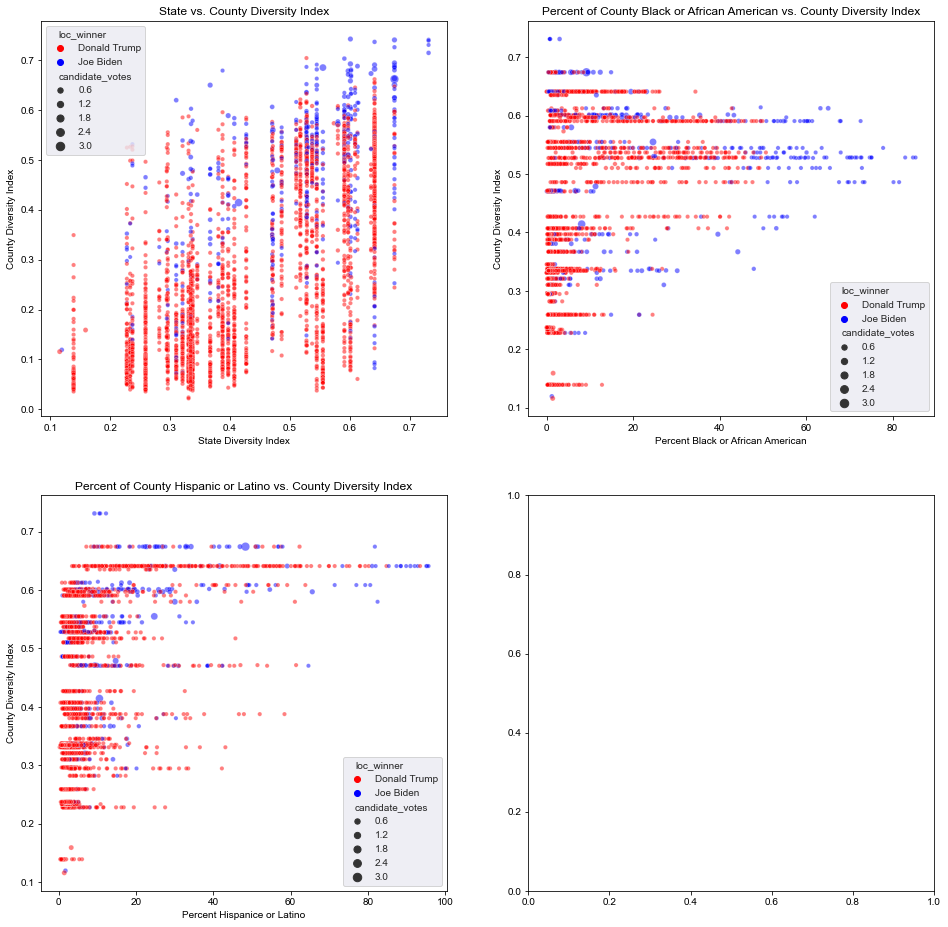

In [87]:
fig, axs = plt.subplots(2,2, figsize=(16,16))

axs[0,0].set_title('State vs. County Diversity Index')
axs[0,0].set_xlabel('State Diversity Index')
axs[0,0].set_ylabel('County Diversity Index')
sns.set_style('darkgrid')
sns.scatterplot(ax=axs[0,0], x='state_DI', y='Loc_DI', hue='loc_winner', data=merged_counties, alpha = 0.5, palette=['red', 'blue'], size='candidate_votes');

axs[0,1].set_title('Percent of County Black or African American vs. County Diversity Index')
axs[0,1].set_xlabel('Percent Black or African American')
axs[0,1].set_ylabel('County Diversity Index')
sns.scatterplot(ax=axs[0,1], x='Black or African American alone, percent', y='state_DI', hue='loc_winner', data=merged_counties, alpha = 0.5, palette=['red', 'blue'], size='candidate_votes');

axs[1,0].set_title('Percent of County Hispanic or Latino vs. County Diversity Index')
axs[1,0].set_xlabel('Percent Hispanice or Latino')
axs[1,0].set_ylabel('County Diversity Index')
sns.scatterplot(ax=axs[1,0], x='Hispanic or Latino, percent', y='state_DI', hue='loc_winner', data=merged_counties, alpha = 0.5, palette=['red', 'blue'], size='candidate_votes');




<AxesSubplot:xlabel='state_abbr', ylabel='Count'>

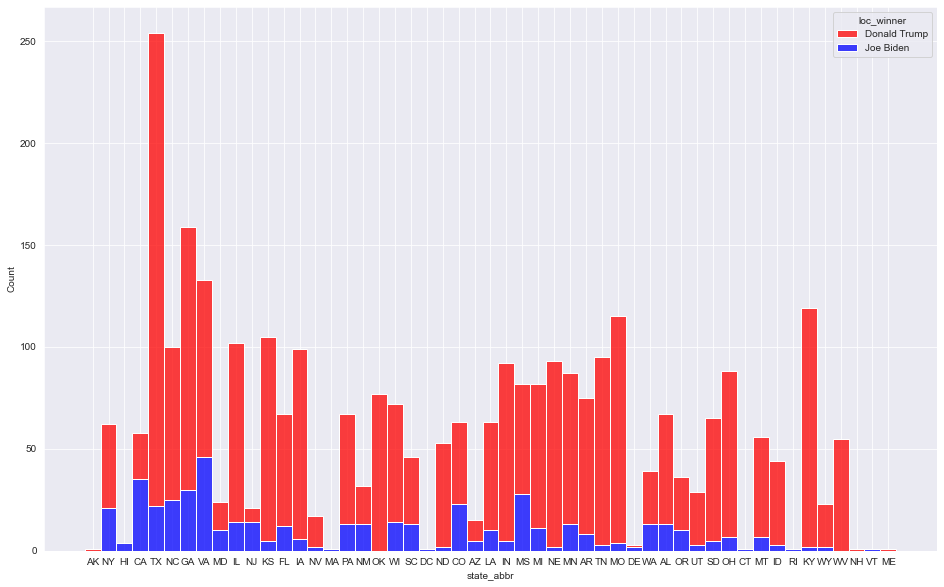

In [89]:
fig, ax = plt.subplots(figsize=(16,10))
sns.histplot(x='state_abbr', data=merged_counties, hue='loc_winner', palette=['red', 'blue'], multiple='stack')

In [90]:
vax_df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [91]:
cov_df = pd.read_csv('data/Provisional_COVID-19_Deaths_by_County__and_Race_and_Hispanic_Origin.csv')
cov_df.head()

,Data as of,Start Date,End Date,State,County Name,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Indicator,...,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic,Other,Urban Rural Description,Footnote
0,07/14/2021,01/01/2020,07/10/2021,AK,Anchorage Municipality,3,2,20,2020,Distribution of all-cause deaths (%),...,204,0.581,0.046,0.210,0.058,0.027,0.031,0.046,Medium metro,NaN
1,07/14/2021,01/01/2020,07/10/2021,AK,Anchorage Municipality,3,2,20,2020,Distribution of COVID-19 deaths (%),...,204,0.324,NaN,0.324,0.147,0.093,NaN,NaN,Medium metro,One or more data cells have counts between 1-9...
2,07/14/2021,01/01/2020,07/10/2021,AK,Anchorage Municipality,3,2,20,2020,Distribution of population (%),...,204,0.571,0.053,0.083,0.098,0.027,0.094,0.075,Medium metro,NaN
3,07/14/2021,01/01/2020,07/10/2021,AL,Baldwin County,4,1,3,1003,Distribution of all-cause deaths (%),...,263,0.906,0.075,NaN,NaN,NaN,0.012,NaN,Small metro,One or more data cells have counts between 1-9...
4,07/14/2021,01/01/2020,07/10/2021,AL,Baldwin County,4,1,3,1003,Distribution of COVID-19 deaths (%),...,263,0.863,0.110,NaN,NaN,NaN,NaN,NaN,Small metro,One or more data cells have counts between 1-9...


In [92]:
cov_df.columns

Index(['Data as of', 'Start Date', 'End Date', 'State', 'County Name',
       'Urban Rural Code', 'FIPS State', 'FIPS County', 'FIPS Code',
       'Indicator', 'Total deaths', 'COVID-19 Deaths', 'Non-Hispanic White',
       'Non-Hispanic Black', 'Non-Hispanic American Indian or Alaska Native',
       'Non-Hispanic Asian',
       'Non-Hispanic Native Hawaiian or Other Pacific Islander', 'Hispanic',
       'Other', 'Urban Rural Description', 'Footnote'],
      dtype='object')

In [93]:
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Data as of                                              2388 non-null   object 
 1   Start Date                                              2388 non-null   object 
 2   End Date                                                2388 non-null   object 
 3   State                                                   2388 non-null   object 
 4   County Name                                             2388 non-null   object 
 5   Urban Rural Code                                        2388 non-null   int64  
 6   FIPS State                                              2388 non-null   int64  
 7   FIPS County                                             2388 non-null   int64  
 8   FIPS Code                             

In [94]:
merged_counties.head()

,Location,Loc_DI,"Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent","Native Hawaiian and Other Pacific Islander alone, percent","Two or More Races, percent","Hispanic or Latino, percent","White alone, not Hispanic or Latino, percent",state,...,state_abbr,won_loc_and_state,candidate_votes_state,total_votes_state,win_ratio,state_DI,DI_diff,2016_unemployment,2018_unemployment,unemployment_diff
0,Alaska,0.573340,3.9,14.7,5.8,1.2,7.1,6.6,62.5,Alaska,...,AK,True,189951.0,359530.0,0.528331,0.573340,0.000000,6.6,5.9,-0.7
1,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7,New York,...,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.141243,4.5,3.5,-1.0
2,"Kings County, NY",0.692349,35.4,1.0,11.7,0.1,2.3,19.6,36.0,New York,...,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.091368,5.3,4.2,-1.1
3,"New York County, NY",0.658205,18.4,1.2,12.1,0.2,3.1,25.8,47.5,New York,...,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.057224,4.5,3.6,-0.9
4,"Westchester County, NY",0.605911,15.9,0.8,6.1,0.1,2.2,23.3,55.7,New York,...,NY,True,5230985.0,8661735.0,0.603919,0.600981,0.004930,4.3,4.1,-0.2


In [95]:
merged_counties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3046 entries, 0 to 3046
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Location                                                   3046 non-null   object 
 1   Loc_DI                                                     3046 non-null   float64
 2   Black or African American alone, percent                   3046 non-null   float64
 3   American Indian and Alaska Native alone, percent           3046 non-null   float64
 4   Asian alone, percent                                       3046 non-null   float64
 5   Native Hawaiian and Other Pacific Islander alone, percent  3046 non-null   float64
 6   Two or More Races, percent                                 3046 non-null   float64
 7   Hispanic or Latino, percent                                3046 non-null   float64
 8   White al

In [96]:
svi_df = pd.read_csv('data/SVI2018_US_COUNTY.csv')
svi_df.head()

,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,35,NEW MEXICO,NM,Rio Arriba,35039,"Rio Arriba County, New Mexico",5860.869195,39307,0,20044,...,0,0,0,1,-999,4160,588,10.6,1.5,32290
1,1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.443459,55200,0,23315,...,0,0,0,0,0,3875,508,7.1,0.9,37301
2,1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.830460,57645,0,24222,...,0,0,0,0,0,6303,732,11.0,1.3,40036
3,1,ALABAMA,AL,Butler,1013,"Butler County, Alabama",776.838201,20025,0,10026,...,0,0,0,0,0,2005,340,10.2,1.7,17280
4,1,ALABAMA,AL,Calhoun,1015,"Calhoun County, Alabama",605.867251,115098,0,53682,...,0,0,0,0,0,10686,796,9.4,0.7,117894


In [97]:
svi_df.columns

Index(['ST', 'STATE', 'ST_ABBR', 'COUNTY', 'FIPS', 'LOCATION', 'AREA_SQMI',
       'E_TOTPOP', 'M_TOTPOP', 'E_HU',
       ...
       'F_CROWD', 'F_NOVEH', 'F_GROUPQ', 'F_THEME4', 'F_TOTAL', 'E_UNINSUR',
       'M_UNINSUR', 'EP_UNINSUR', 'MP_UNINSUR', 'E_DAYPOP'],
      dtype='object', length=123)

In [98]:
merged_counties.columns

Index(['Location', 'Loc_DI', 'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, not Hispanic or Latino, percent', 'state', 'loc_winner',
       'candidate_votes', 'state_abbr', 'won_loc_and_state',
       'candidate_votes_state', 'total_votes_state', 'win_ratio', 'state_DI',
       'DI_diff', '2016_unemployment', '2018_unemployment',
       'unemployment_diff'],
      dtype='object')

In [99]:
merged_counties.loc_winner.value_counts()

Donald Trump    2561
Joe Biden        485
Name: loc_winner, dtype: int64

In [100]:
merged_counties.drop('state', axis =1, inplace=True)

In [101]:
merged_counties.rename(mapper={'loc_winner':'target'}, axis=1, inplace=True)

In [102]:
target_dict = {'Donald Trump':0, 'Joe Biden':1}
merged_counties['target'] = merged_counties['target'].map(target_dict)

In [103]:
merged_counties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3046 entries, 0 to 3046
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Location                                                   3046 non-null   object 
 1   Loc_DI                                                     3046 non-null   float64
 2   Black or African American alone, percent                   3046 non-null   float64
 3   American Indian and Alaska Native alone, percent           3046 non-null   float64
 4   Asian alone, percent                                       3046 non-null   float64
 5   Native Hawaiian and Other Pacific Islander alone, percent  3046 non-null   float64
 6   Two or More Races, percent                                 3046 non-null   float64
 7   Hispanic or Latino, percent                                3046 non-null   float64
 8   White al

In [104]:
merged_counties['state_abbr'].value_counts()

TX    254
GA    159
VA    133
KY    119
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MS     82
MI     82
OK     77
AR     75
WI     72
AL     67
FL     67
PA     67
SD     65
CO     63
LA     63
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     32
UT     29
MD     24
WY     23
NJ     21
NV     17
AZ     15
HI      4
DE      3
DC      1
ME      1
AK      1
NH      1
VT      1
MA      1
RI      1
CT      1
Name: state_abbr, dtype: int64

In [105]:
single_states = ['AK', 'CT', 'NH', 'MA', 'DC', 'ME', 'RI', 'VT']
indices = []
for state in single_states:
    indices.append(merged_counties[merged_counties['state_abbr']==state].index[0])
indices

[0, 2745, 3044, 1206, 1501, 3046, 2846, 3045]

In [106]:
merged_counties.drop(index=indices, inplace=True)
merged_counties['state_abbr'].value_counts()

TX    254
GA    159
VA    133
KY    119
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     82
MS     82
OK     77
AR     75
WI     72
PA     67
AL     67
FL     67
SD     65
LA     63
CO     63
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     32
UT     29
MD     24
WY     23
NJ     21
NV     17
AZ     15
HI      4
DE      3
Name: state_abbr, dtype: int64

In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [108]:
X = merged_counties.drop(['Location', 'target'], axis=1)
y = merged_counties['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=merged_counties['state_abbr'], random_state=42)

<AxesSubplot:>

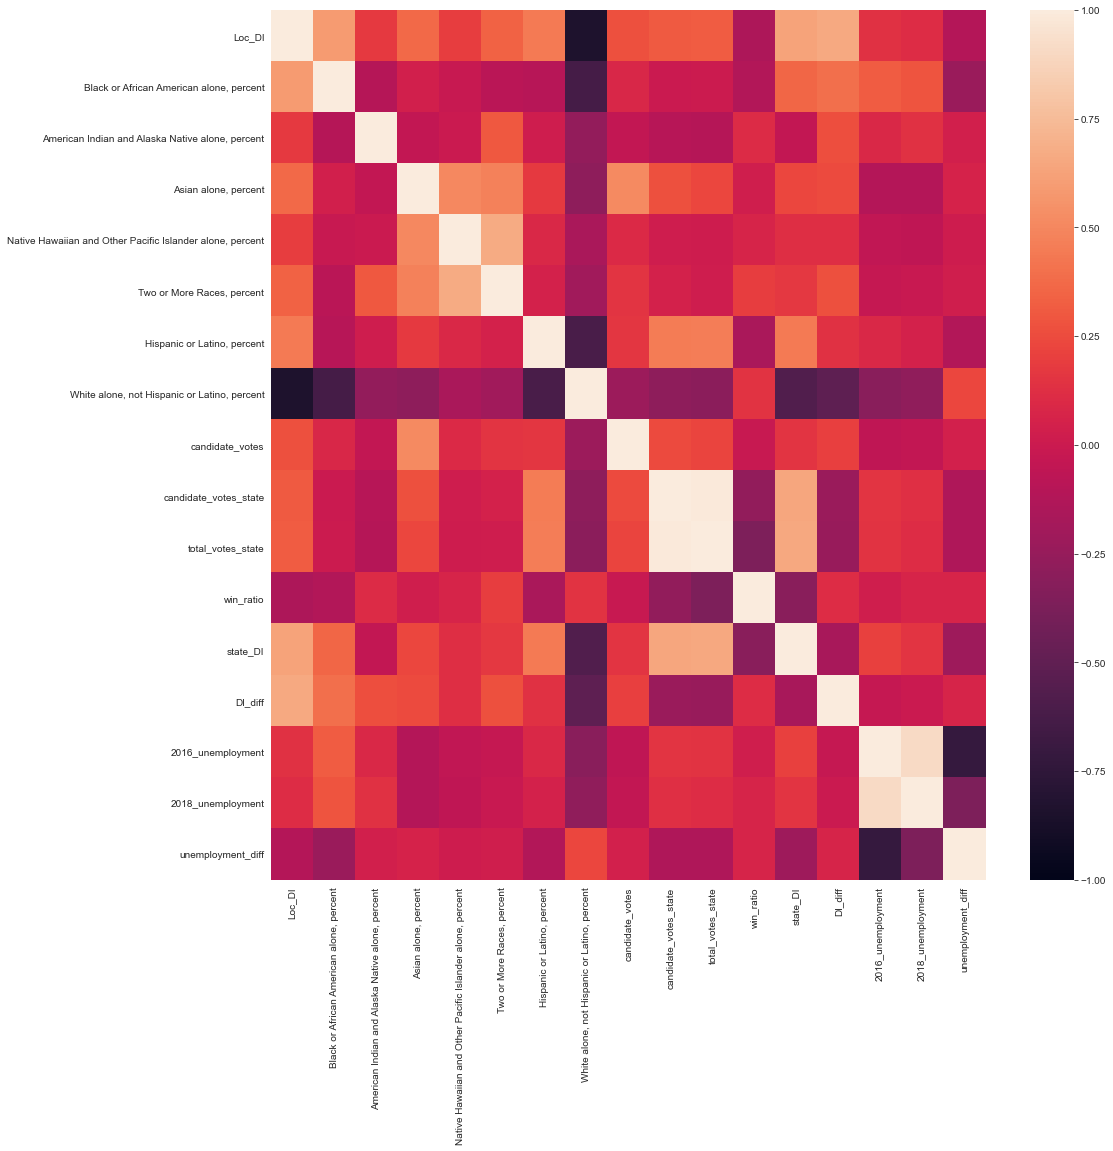

In [109]:
fig = plt.figure(figsize=(16,16))
sns.heatmap(X.corr(), vmin=-1, vmax=1)

In [110]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [111]:
y.value_counts()

0    2558
1     480
Name: target, dtype: int64

In [112]:
# Make dummy model to predict majority class
dummy = DummyClassifier(strategy='most_frequent', random_state=42).fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [113]:
#Function to print out metrics nicely
def evaluation_report(model, X, y):
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))
    plot_confusion_matrix(model, X, y, cmap='GnBu')
    plt.grid(False)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       654
           1       0.00      0.00      0.00       106

    accuracy                           0.86       760
   macro avg       0.43      0.50      0.46       760
weighted avg       0.74      0.86      0.80       760



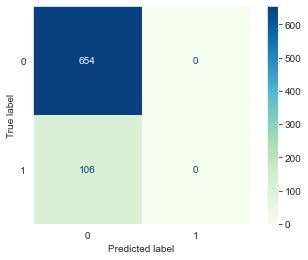

In [114]:
evaluation_report(dummy, X_test, y_test)

In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 799 to 2248
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Loc_DI                                                     2278 non-null   float64
 1   Black or African American alone, percent                   2278 non-null   float64
 2   American Indian and Alaska Native alone, percent           2278 non-null   float64
 3   Asian alone, percent                                       2278 non-null   float64
 4   Native Hawaiian and Other Pacific Islander alone, percent  2278 non-null   float64
 5   Two or More Races, percent                                 2278 non-null   float64
 6   Hispanic or Latino, percent                                2278 non-null   float64
 7   White alone, not Hispanic or Latino, percent               2278 non-null   float64
 8   candid

In [116]:
X_train_nums = X_train.select_dtypes(['float64'])
X_train_cat = X_train.select_dtypes(exclude = ['float64'])

In [117]:
num_pipeline = Pipeline(steps=[
                                ('ss', StandardScaler())
                            ])


cat_pipeline = Pipeline(steps=[
                            ('ohe', OneHotEncoder(drop='first',
                                                 sparse=False))
                            ])


trans = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, X_train_nums.columns),
    ('categorical', cat_pipeline, X_train_cat.columns)
])

In [118]:
lr_pipe = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression(penalty = 'none', max_iter = 1000, random_state=42))
])

In [119]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['Loc_DI', 'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, n...
       'candidate_votes_state', 'total_votes_state', 'win_ratio', 'state_DI',
       'DI_diff', '2016_unemployment', '2018_unemployment',
       'unemployment_diff'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                         

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       654
           1       0.81      0.71      0.75       106

    accuracy                           0.94       760
   macro avg       0.88      0.84      0.86       760
weighted avg       0.93      0.94      0.93       760



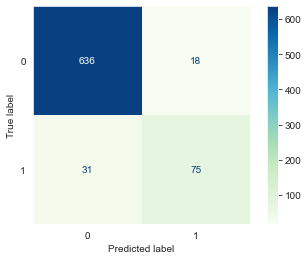

In [120]:
evaluation_report(lr_pipe, X_test, y_test)

In [121]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [122]:
num_pipeline = imbpipeline(steps=[
                                ('ss', StandardScaler())
                            ])

cat_pipeline = imbpipeline(steps=[
                            ('ohe', OneHotEncoder(drop='first',
                                                 sparse=False))
                            ])

trans = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, X_train_nums.columns),
    ('categorical', cat_pipeline, X_train_cat.columns)
])

In [123]:
lr_scaled_pipe = imbpipeline(steps=[
    ('trans', trans),
    ('sm', SMOTE(random_state=42)),
    ('lr', LogisticRegression(max_iter = 10000, random_state=42))
])

In [124]:
lr_scaled_pipe.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['Loc_DI', 'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, n...
       'candidate_votes_state', 'total_votes_state', 'win_ratio', 'state_DI',
       'DI_diff', '2016_unemployment', '2018_unemployment',
       'unemployment_diff'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                         

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       654
           1       0.63      0.87      0.73       106

    accuracy                           0.91       760
   macro avg       0.81      0.89      0.84       760
weighted avg       0.93      0.91      0.92       760



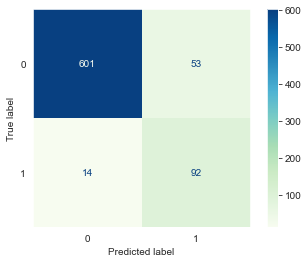

In [125]:
evaluation_report(lr_scaled_pipe, X_test, y_test)

In [126]:
lr_scaled_pipe['lr'].coef_[0]

array([-1.55540361e+00,  2.34637496e+00,  2.61405385e-01,  2.27593351e+00,
       -6.80617713e-01,  1.30341288e+00,  5.12830784e-01, -2.19437583e+00,
        1.21533543e+00,  1.24496889e+00, -7.94089181e-01, -5.49074354e-01,
       -1.39121524e+00, -6.33648343e-01, -2.87892855e-01, -2.94563499e-01,
        1.48409336e-01, -8.28469341e-01,  1.24356141e+00,  1.53072854e+00,
        3.17254791e+00,  4.89640578e-01, -1.77061508e+00, -1.83665376e+00,
        6.43562540e-05, -4.14780220e-01,  1.78845254e+00,  9.93907890e-01,
       -1.23085028e+00, -1.23895232e+00, -7.03046612e-01, -5.20697147e-01,
        7.22767271e-01,  6.68291303e-01,  1.26688172e+00, -1.02012108e+00,
       -7.24144629e-01,  1.34888366e+00, -1.09422938e+00, -6.31248934e-01,
       -3.20219101e-01,  1.36624302e+00,  2.28089394e+00,  7.61935441e-03,
        2.18497783e+00, -1.21441806e+00, -3.08492489e+00,  1.86521359e+00,
        3.28245868e-01, -1.30410104e+00, -5.95258784e-01, -1.83804171e+00,
       -2.83929721e+00,  

In [127]:
ohe_cols = list(lr_scaled_pipe.named_steps['trans'].transformers_[1][1]\
   .named_steps['ohe'].get_feature_names(X_train_cat.columns))
ohe_cols

['state_abbr_AR',
 'state_abbr_AZ',
 'state_abbr_CA',
 'state_abbr_CO',
 'state_abbr_DE',
 'state_abbr_FL',
 'state_abbr_GA',
 'state_abbr_HI',
 'state_abbr_IA',
 'state_abbr_ID',
 'state_abbr_IL',
 'state_abbr_IN',
 'state_abbr_KS',
 'state_abbr_KY',
 'state_abbr_LA',
 'state_abbr_MD',
 'state_abbr_MI',
 'state_abbr_MN',
 'state_abbr_MO',
 'state_abbr_MS',
 'state_abbr_MT',
 'state_abbr_NC',
 'state_abbr_ND',
 'state_abbr_NE',
 'state_abbr_NJ',
 'state_abbr_NM',
 'state_abbr_NV',
 'state_abbr_NY',
 'state_abbr_OH',
 'state_abbr_OK',
 'state_abbr_OR',
 'state_abbr_PA',
 'state_abbr_SC',
 'state_abbr_SD',
 'state_abbr_TN',
 'state_abbr_TX',
 'state_abbr_UT',
 'state_abbr_VA',
 'state_abbr_WA',
 'state_abbr_WI',
 'state_abbr_WV',
 'state_abbr_WY',
 'won_loc_and_state_True']

In [128]:
num_cols = list(X_train_nums.columns)
num_cols

['Loc_DI',
 'Black or African American alone, percent',
 'American Indian and Alaska Native alone, percent',
 'Asian alone, percent',
 'Native Hawaiian and Other Pacific Islander alone, percent',
 'Two or More Races, percent',
 'Hispanic or Latino, percent',
 'White alone, not Hispanic or Latino, percent',
 'candidate_votes',
 'candidate_votes_state',
 'total_votes_state',
 'win_ratio',
 'state_DI',
 'DI_diff',
 '2016_unemployment',
 '2018_unemployment',
 'unemployment_diff']

In [129]:
all_cols = num_cols + ohe_cols

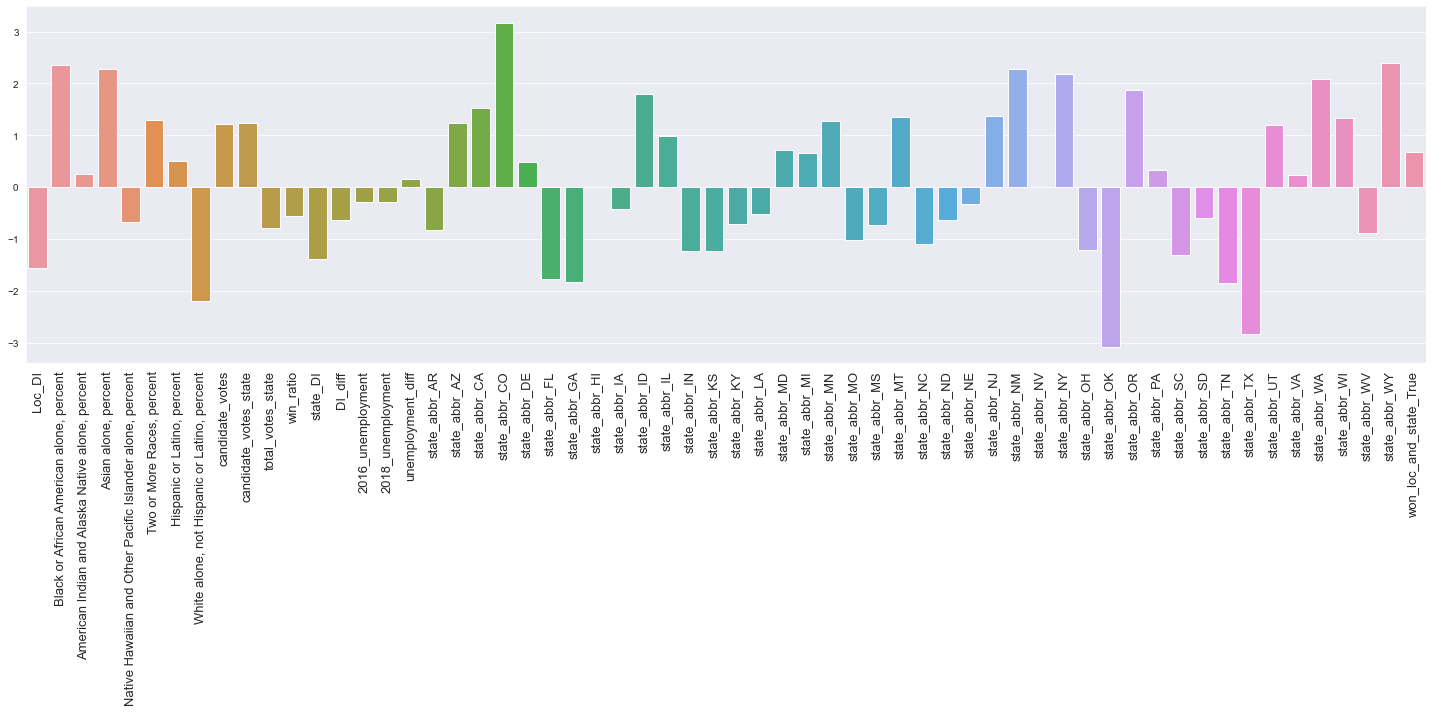

In [179]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=all_cols, y=lr_scaled_pipe['lr'].coef_[0])
plt.xticks(rotation=90, fontsize=13)
plt.tight_layout()

In [130]:
params = {
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear', 'lbfgs'],
    'lr__C': [1, 100, 1000]
}

lr_cv = GridSearchCV(lr_scaled_pipe, param_grid=params, scoring='f1', n_jobs=-1)

In [131]:
lr_cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['Loc_DI', 'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino...
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
   

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1904
           1       0.69      0.90      0.78       374

    accuracy                           0.92      2278
   macro avg       0.84      0.91      0.87      2278
weighted avg       0.93      0.92      0.92      2278



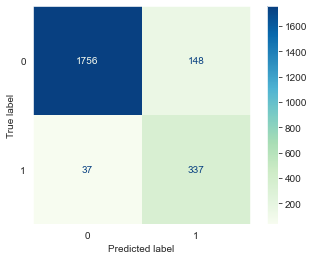

In [132]:
evaluation_report(lr_cv, X_train, y_train)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       654
           1       0.63      0.87      0.73       106

    accuracy                           0.91       760
   macro avg       0.81      0.89      0.84       760
weighted avg       0.93      0.91      0.92       760



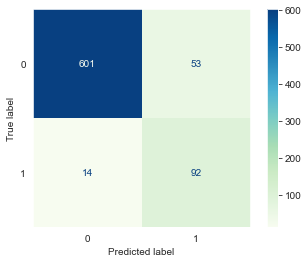

In [135]:
evaluation_report(lr_cv, X_test, y_test)

In [141]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [157]:
tree_pipe = Pipeline(steps=[
    ('trans', trans),
    ('dtc', DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=2))
])

In [158]:
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['Loc_DI', 'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, n...
       'candidate_votes_state', 'total_votes_state', 'win_ratio', 'state_DI',
       'DI_diff', '2016_unemployment', '2018_unemployment',
       'unemployment_diff'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                         

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1904
           1       0.47      0.91      0.62       374

    accuracy                           0.81      2278
   macro avg       0.72      0.85      0.75      2278
weighted avg       0.89      0.81      0.84      2278



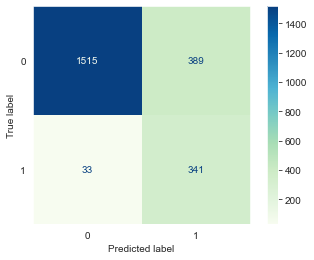

In [159]:
evaluation_report(tree_pipe, X_train, y_train)

In [162]:
tree_pipe['dtc'].feature_importances_

array([0.        , 0.        , 0.        , 0.51812063, 0.        ,
       0.        , 0.01723833, 0.46464104, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])